C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/2187602332.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/2187602332.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/2187602332.py:30: SettingWithCopyWarning: 
A va

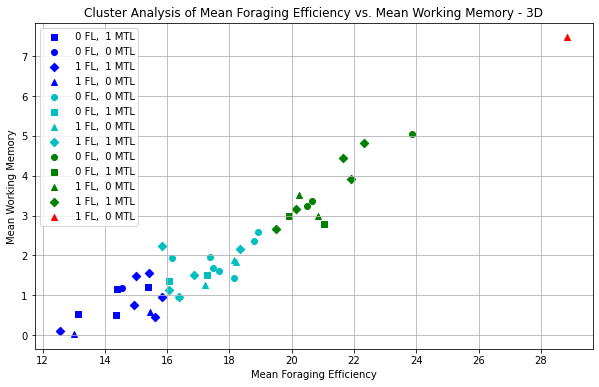

Silhouette Score: 0.47014060067515345


ValueError: DataFrame constructor not properly called!

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your data (assuming it's stored in a CSV file)
data = pd.read_excel('Data.xlsx')
vr_fe_columns = data.filter(regex='VR_FE_trial_\d+')
vr_wm_columns = data.filter(regex='VR_WM_trial_\d+')

# Calculate the mean of each trial
data['Mean_VR_FE'] = vr_fe_columns.mean(axis=1)
data['Mean_VR_WM'] = vr_wm_columns.mean(axis=1)

# Filter the data for the specified columns
data_filtered = data[['FL_group', 'MTL_group', 'Mean_VR_FE', 'Mean_VR_WM']]

# Replace 'Low' and 'High' with numerical values (e.g., 0 for Low, 1 for High)
data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})

# Perform K-means clustering on the features
n_clusters =4 # Number of clusters
data_features = data_filtered[['Mean_VR_FE', 'Mean_VR_WM']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_features)

# Add cluster labels to the DataFrame
data_filtered['Cluster_Label'] = kmeans.labels_

# Define unique markers for each combination of 'FL_group' and 'MTL_group'
markers = ['o', 's', '^', 'D']  # You can customize this based on your preference
colors = ['b', 'g', 'r', 'c']

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))
# Loop through each cluster
for cluster_id in data_filtered['Cluster_Label'].unique():
    cluster_data = data_filtered[data_filtered['Cluster_Label'] == cluster_id]
    
    # Loop through each combination of 'FL_group' and 'MTL_group'
    for fl_group in cluster_data['FL_group'].unique():
        for mtl_group in cluster_data['MTL_group'].unique():
            subset = cluster_data[(cluster_data['FL_group'] == fl_group) & (cluster_data['MTL_group'] == mtl_group)]
            marker = markers[fl_group * 2 + mtl_group]  # Choose a marker based on 'FL_group' and 'MTL_group'
            
           

            
            plt.scatter(subset['Mean_VR_FE'], subset['Mean_VR_WM'], label=f' {fl_group} FL,  {mtl_group} MTL',
                        c=colors[cluster_id],marker=marker)

# Add labels, legend, and title
plt.xlabel('Mean Foraging Efficiency')
plt.ylabel('Mean Working Memory')
plt.legend()
plt.title('Cluster Analysis of Mean Foraging Efficiency vs. Mean Working Memory - 3D')
plt.grid(True)
# Show the plot
plt.show()
#print(data_filtered)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have already performed K-means clustering and have cluster labels in data_filtered
cluster_labels = data_filtered['Cluster_Label']
data_features = data_filtered[['Mean_VR_FE', 'Mean_VR_WM']].values

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")
df=pd.DataFrame(silhouette_avg)

C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/2768660001.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/2768660001.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/2768660001.py:24: SettingWithCopyWarning: 
A va

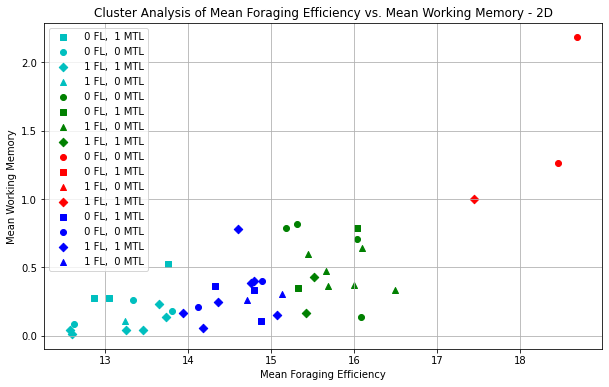

Silhouette Score: 0.4898936718482894


In [4]:

ts_fe_columns = data.filter(regex='TS_FE_trial_\d+')
ts_wm_columns = data.filter(regex='TS_WM_trial_\d+')

# Calculate the mean of each trial
data['Mean_TS_FE'] = ts_fe_columns.mean(axis=1)
data['Mean_TS_WM'] = ts_wm_columns.mean(axis=1)

# Filter the data for the specified columns
data_filtered = data[['FL_group', 'MTL_group', 'Mean_TS_FE', 'Mean_TS_WM']]

# Replace 'Low' and 'High' with numerical values (e.g., 0 for Low, 1 for High)
data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})

# Drop rows with missing values
#data_filtered.dropna(inplace=True)

# Perform K-means clustering on the features
n_clusters =4 # Number of clusters
data_features = data_filtered[['Mean_TS_FE', 'Mean_TS_WM']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_features)

# Add cluster labels to the DataFrame
data_filtered['Cluster_Label'] = kmeans.labels_




# Assuming you have a DataFrame df containing the data
# 'Cluster_Label' is the cluster label assigned during clustering
# 'FL_group' and 'MTL_group' are the two c

# Define unique markers for each combination of 'FL_group' and 'MTL_group'
markers = ['o', 's', '^', 'D']  # You can customize this based on your preference
colors = ['b', 'g', 'r', 'c']
# Create a figure and axis for the plot

plt.figure(figsize=(10, 6))
# Loop through each cluster
for cluster_id in data_filtered['Cluster_Label'].unique():
    cluster_data = data_filtered[data_filtered['Cluster_Label'] == cluster_id]
    
    # Loop through each combination of 'FL_group' and 'MTL_group'
    for fl_group in cluster_data['FL_group'].unique():
        for mtl_group in cluster_data['MTL_group'].unique():
            subset = cluster_data[(cluster_data['FL_group'] == fl_group) & (cluster_data['MTL_group'] == mtl_group)]
            marker = markers[fl_group * 2 + mtl_group]  # Choose a marker based on 'FL_group' and 'MTL_group'
            
           

            
            plt.scatter(subset['Mean_TS_FE'], subset['Mean_TS_WM'], label=f' {fl_group} FL,  {mtl_group} MTL',c=colors[cluster_id],marker=marker)

# Add labels, legend, and title
plt.xlabel('Mean Foraging Efficiency')
plt.ylabel('Mean Working Memory')
plt.legend()
plt.title('Cluster Analysis of Mean Foraging Efficiency vs. Mean Working Memory - 2D')
plt.grid(True)
# Show the plot
plt.show()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have already performed K-means clustering and have cluster labels in data_filtered
cluster_labels = data_filtered['Cluster_Label']
data_features = data_filtered[['Mean_TS_FE', 'Mean_TS_WM']].values

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/1618637395.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/1618637395.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/1618637395.py:24: SettingWithCopyWarning: 
A va

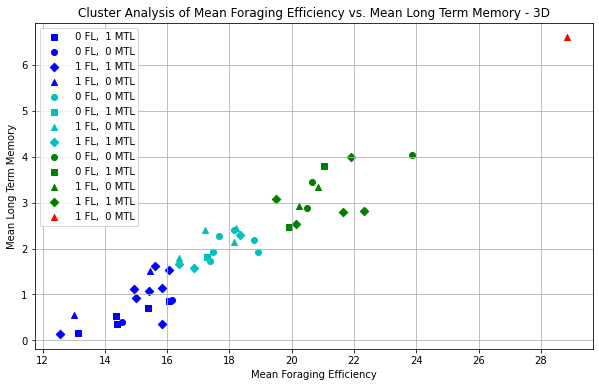

Silhouette Score: 0.5134277320874392


In [5]:
vr_fe_columns = data.filter(regex='VR_FE_trial_\d+')
vr_ltm_columns = data.filter(regex='VR_LTM_trial_\d+')

# Calculate the mean of each trial
data['Mean_VR_FE'] = vr_fe_columns.mean(axis=1)
data['Mean_VR_LTM'] = vr_ltm_columns.mean(axis=1)

# Filter the data for the specified columns
data_filtered = data[['FL_group', 'MTL_group', 'Mean_VR_FE', 'Mean_VR_LTM']]

# Replace 'Low' and 'High' with numerical values (e.g., 0 for Low, 1 for High)
data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})

# Drop rows with missing values
#data_filtered.dropna(inplace=True)

# Perform K-means clustering on the features
n_clusters =4 # Number of clusters
data_features = data_filtered[['Mean_VR_FE', 'Mean_VR_LTM']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_features)

# Add cluster labels to the DataFrame
data_filtered['Cluster_Label'] = kmeans.labels_




# Assuming you have a DataFrame df containing the data
# 'Cluster_Label' is the cluster label assigned during clustering
# 'FL_group' and 'MTL_group' are the two c

# Define unique markers for each combination of 'FL_group' and 'MTL_group'
markers = ['o', 's', '^', 'D']  # You can customize this based on your preference
colors = ['b', 'g', 'r', 'c']
# Create a figure and axis for the plot

plt.figure(figsize=(10, 6))
# Loop through each cluster
for cluster_id in data_filtered['Cluster_Label'].unique():
    cluster_data = data_filtered[data_filtered['Cluster_Label'] == cluster_id]
    
    # Loop through each combination of 'FL_group' and 'MTL_group'
    for fl_group in cluster_data['FL_group'].unique():
        for mtl_group in cluster_data['MTL_group'].unique():
            subset = cluster_data[(cluster_data['FL_group'] == fl_group) & (cluster_data['MTL_group'] == mtl_group)]
            marker = markers[fl_group * 2 + mtl_group]  # Choose a marker based on 'FL_group' and 'MTL_group'
            
           

            
            plt.scatter(subset['Mean_VR_FE'], subset['Mean_VR_LTM'], label=f' {fl_group} FL,  {mtl_group} MTL',c=colors[cluster_id],marker=marker)

# Add labels, legend, and title
plt.xlabel('Mean Foraging Efficiency')
plt.ylabel('Mean Long Term Memory')
plt.legend()
plt.title('Cluster Analysis of Mean Foraging Efficiency vs. Mean Long Term Memory - 3D')
plt.grid(True)
# Show the plot
plt.show()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have already performed K-means clustering and have cluster labels in data_filtered
cluster_labels = data_filtered['Cluster_Label']
data_features = data_filtered[['Mean_VR_FE', 'Mean_VR_LTM']].values

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/176922779.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/176922779.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/176922779.py:24: SettingWithCopyWarning: 
A value

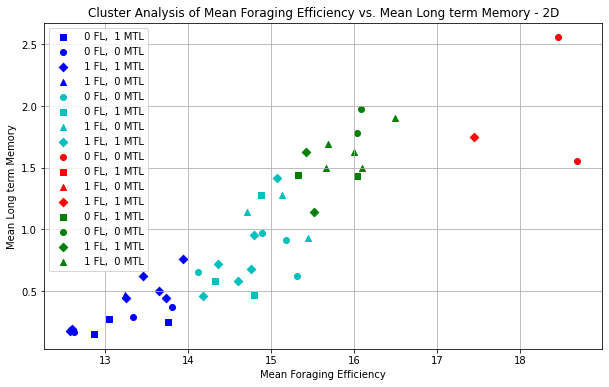

Silhouette Score: 0.4966188555183205


In [6]:
ts_fe_columns = data.filter(regex='TS_FE_trial_\d+')
ts_ltm_columns = data.filter(regex='TS_LTM_trial_\d+')

# Calculate the mean of each trial
data['Mean_TS_FE'] = ts_fe_columns.mean(axis=1)
data['Mean_TS_LTM'] = ts_ltm_columns.mean(axis=1)

# Filter the data for the specified columns
data_filtered = data[['FL_group', 'MTL_group', 'Mean_TS_FE', 'Mean_TS_LTM']]

# Replace 'Low' and 'High' with numerical values (e.g., 0 for Low, 1 for High)
data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})

# Drop rows with missing values
#data_filtered.dropna(inplace=True)

# Perform K-means clustering on the features
n_clusters =4 # Number of clusters
data_features = data_filtered[['Mean_TS_FE', 'Mean_TS_LTM']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_features)

# Add cluster labels to the DataFrame
data_filtered['Cluster_Label'] = kmeans.labels_




# Assuming you have a DataFrame df containing the data
# 'Cluster_Label' is the cluster label assigned during clustering
# 'FL_group' and 'MTL_group' are the two c

# Define unique markers for each combination of 'FL_group' and 'MTL_group'
markers = ['o', 's', '^', 'D']  # You can customize this based on your preference
colors = ['b', 'g', 'r', 'c']
# Create a figure and axis for the plot

plt.figure(figsize=(10, 6))
# Loop through each cluster
for cluster_id in data_filtered['Cluster_Label'].unique():
    cluster_data = data_filtered[data_filtered['Cluster_Label'] == cluster_id]
    
    # Loop through each combination of 'FL_group' and 'MTL_group'
    for fl_group in cluster_data['FL_group'].unique():
        for mtl_group in cluster_data['MTL_group'].unique():
            subset = cluster_data[(cluster_data['FL_group'] == fl_group) & (cluster_data['MTL_group'] == mtl_group)]
            marker = markers[fl_group * 2 + mtl_group]  # Choose a marker based on 'FL_group' and 'MTL_group'
            
           

            
            plt.scatter(subset['Mean_TS_FE'], subset['Mean_TS_LTM'], label=f' {fl_group} FL,  {mtl_group} MTL',c=colors[cluster_id],marker=marker)

# Add labels, legend, and title
plt.xlabel('Mean Foraging Efficiency')
plt.ylabel('Mean Long term Memory')
plt.legend()
plt.title('Cluster Analysis of Mean Foraging Efficiency vs. Mean Long term Memory - 2D')
plt.grid(True)
# Show the plot
plt.show()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have already performed K-means clustering and have cluster labels in data_filtered
cluster_labels = data_filtered['Cluster_Label']
data_features = data_filtered[['Mean_TS_FE', 'Mean_TS_LTM']].values

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/3387708885.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/3387708885.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/3387708885.py:24: SettingWithCopyWarning: 
A va

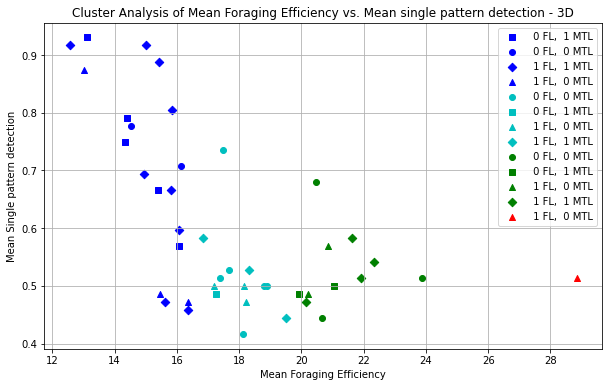

Silhouette Score: 0.5395698589074852


In [7]:
vr_fe_columns = data.filter(regex='VR_FE_trial_\d+')
vr_pd1_columns = data.filter(regex='VR_PD1_trial_\d+')

# Calculate the mean of each trial
data['Mean_VR_FE'] = vr_fe_columns.mean(axis=1)
data['Mean_VR_PD1'] = vr_pd1_columns.mean(axis=1)

# Filter the data for the specified columns
data_filtered = data[['FL_group', 'MTL_group', 'Mean_VR_FE', 'Mean_VR_PD1']]

# Replace 'Low' and 'High' with numerical values (e.g., 0 for Low, 1 for High)
data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})

# Drop rows with missing values
#data_filtered.dropna(inplace=True)

# Perform K-means clustering on the features
n_clusters =4 # Number of clusters
data_features = data_filtered[['Mean_VR_FE', 'Mean_VR_PD1']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_features)

# Add cluster labels to the DataFrame
data_filtered['Cluster_Label'] = kmeans.labels_




# Assuming you have a DataFrame df containing the data
# 'Cluster_Label' is the cluster label assigned during clustering
# 'FL_group' and 'MTL_group' are the two c

# Define unique markers for each combination of 'FL_group' and 'MTL_group'
markers = ['o', 's', '^', 'D']  # You can customize this based on your preference
colors = ['b', 'g', 'r', 'c']
# Create a figure and axis for the plot

plt.figure(figsize=(10, 6))
# Loop through each cluster
for cluster_id in data_filtered['Cluster_Label'].unique():
    cluster_data = data_filtered[data_filtered['Cluster_Label'] == cluster_id]
    
    # Loop through each combination of 'FL_group' and 'MTL_group'
    for fl_group in cluster_data['FL_group'].unique():
        for mtl_group in cluster_data['MTL_group'].unique():
            subset = cluster_data[(cluster_data['FL_group'] == fl_group) & (cluster_data['MTL_group'] == mtl_group)]
            marker = markers[fl_group * 2 + mtl_group]  # Choose a marker based on 'FL_group' and 'MTL_group'
            
           

            
            plt.scatter(subset['Mean_VR_FE'], subset['Mean_VR_PD1'], label=f' {fl_group} FL,  {mtl_group} MTL',c=colors[cluster_id],marker=marker)

# Add labels, legend, and title
plt.xlabel('Mean Foraging Efficiency')
plt.ylabel('Mean Single pattern detection')
plt.legend()
plt.title('Cluster Analysis of Mean Foraging Efficiency vs. Mean single pattern detection - 3D')
plt.grid(True)
# Show the plot
plt.show()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have already performed K-means clustering and have cluster labels in data_filtered
cluster_labels = data_filtered['Cluster_Label']
data_features = data_filtered[['Mean_VR_FE', 'Mean_VR_PD1']].values

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/39890584.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/39890584.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/39890584.py:24: SettingWithCopyWarning: 
A value is

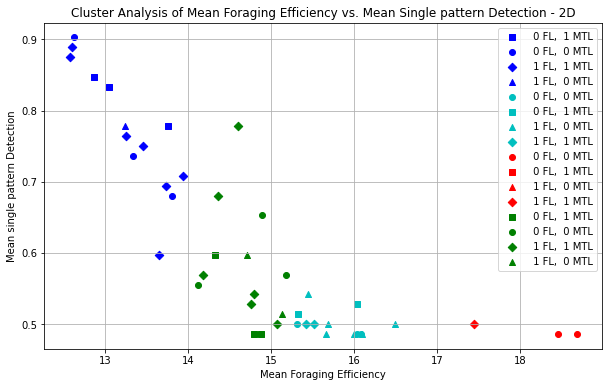

Silhouette Score: 0.547185105365891


In [8]:
ts_fe_columns = data.filter(regex='TS_FE_trial_\d+')
ts_pd1_columns = data.filter(regex='TS_PD1_trial_\d+')

# Calculate the mean of each trial
data['Mean_TS_FE'] = ts_fe_columns.mean(axis=1)
data['Mean_TS_PD1'] = ts_pd1_columns.mean(axis=1)

# Filter the data for the specified columns
data_filtered = data[['FL_group', 'MTL_group', 'Mean_TS_FE', 'Mean_TS_PD1']]

# Replace 'Low' and 'High' with numerical values (e.g., 0 for Low, 1 for High)
data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})

# Drop rows with missing values
#data_filtered.dropna(inplace=True)

# Perform K-means clustering on the features
n_clusters =4 # Number of clusters
data_features = data_filtered[['Mean_TS_FE', 'Mean_TS_PD1']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_features)

# Add cluster labels to the DataFrame
data_filtered['Cluster_Label'] = kmeans.labels_




# Assuming you have a DataFrame df containing the data
# 'Cluster_Label' is the cluster label assigned during clustering
# 'FL_group' and 'MTL_group' are the two c

# Define unique markers for each combination of 'FL_group' and 'MTL_group'
markers = ['o', 's', '^', 'D']  # You can customize this based on your preference
colors = ['b', 'g', 'r', 'c']
# Create a figure and axis for the plot

plt.figure(figsize=(10, 6))
# Loop through each cluster
for cluster_id in data_filtered['Cluster_Label'].unique():
    cluster_data = data_filtered[data_filtered['Cluster_Label'] == cluster_id]
    
    # Loop through each combination of 'FL_group' and 'MTL_group'
    for fl_group in cluster_data['FL_group'].unique():
        for mtl_group in cluster_data['MTL_group'].unique():
            subset = cluster_data[(cluster_data['FL_group'] == fl_group) & (cluster_data['MTL_group'] == mtl_group)]
            marker = markers[fl_group * 2 + mtl_group]  # Choose a marker based on 'FL_group' and 'MTL_group'
            
           

            
            plt.scatter(subset['Mean_TS_FE'], subset['Mean_TS_PD1'], label=f' {fl_group} FL,  {mtl_group} MTL',c=colors[cluster_id],marker=marker)

# Add labels, legend, and title
plt.xlabel('Mean Foraging Efficiency')
plt.ylabel('Mean single pattern Detection')
plt.legend()
plt.title('Cluster Analysis of Mean Foraging Efficiency vs. Mean Single pattern Detection - 2D')
plt.grid(True)
# Show the plot
plt.show()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have already performed K-means clustering and have cluster labels in data_filtered
cluster_labels = data_filtered['Cluster_Label']
data_features = data_filtered[['Mean_TS_FE', 'Mean_TS_PD1']].values

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")



C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/1306174016.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/1306174016.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/1306174016.py:24: SettingWithCopyWarning: 
A va

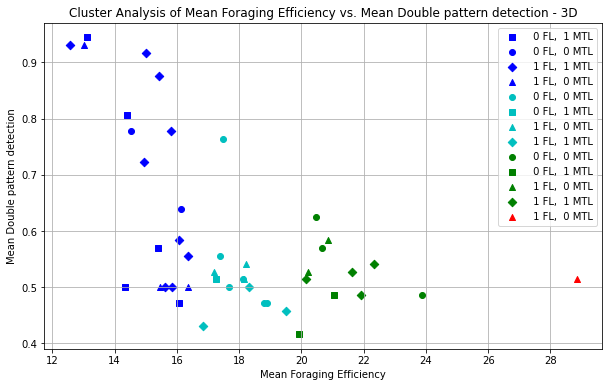

Silhouette Score: 0.5395359695718616


In [9]:
vr_fe_columns = data.filter(regex='VR_FE_trial_\d+')
vr_pd2_columns = data.filter(regex='VR_PD2_trial_\d+')

# Calculate the mean of each trial
data['Mean_VR_FE'] = vr_fe_columns.mean(axis=1)
data['Mean_VR_PD2'] = vr_pd2_columns.mean(axis=1)

# Filter the data for the specified columns
data_filtered = data[['FL_group', 'MTL_group', 'Mean_VR_FE', 'Mean_VR_PD2']]

# Replace 'Low' and 'High' with numerical values (e.g., 0 for Low, 1 for High)
data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})

# Drop rows with missing values
#data_filtered.dropna(inplace=True)

# Perform K-means clustering on the features
n_clusters =4 # Number of clusters
data_features = data_filtered[['Mean_VR_FE', 'Mean_VR_PD2']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_features)

# Add cluster labels to the DataFrame
data_filtered['Cluster_Label'] = kmeans.labels_




# Assuming you have a DataFrame df containing the data
# 'Cluster_Label' is the cluster label assigned during clustering
# 'FL_group' and 'MTL_group' are the two c

# Define unique markers for each combination of 'FL_group' and 'MTL_group'
markers = ['o', 's', '^', 'D']  # You can customize this based on your preference
colors = ['b', 'g', 'r', 'c']
# Create a figure and axis for the plot

plt.figure(figsize=(10, 6))
# Loop through each cluster
for cluster_id in data_filtered['Cluster_Label'].unique():
    cluster_data = data_filtered[data_filtered['Cluster_Label'] == cluster_id]
    
    # Loop through each combination of 'FL_group' and 'MTL_group'
    for fl_group in cluster_data['FL_group'].unique():
        for mtl_group in cluster_data['MTL_group'].unique():
            subset = cluster_data[(cluster_data['FL_group'] == fl_group) & (cluster_data['MTL_group'] == mtl_group)]
            marker = markers[fl_group * 2 + mtl_group]  # Choose a marker based on 'FL_group' and 'MTL_group'
            
           

            
            plt.scatter(subset['Mean_VR_FE'], subset['Mean_VR_PD2'], label=f' {fl_group} FL,  {mtl_group} MTL',c=colors[cluster_id],marker=marker)

# Add labels, legend, and title
plt.xlabel('Mean Foraging Efficiency')
plt.ylabel('Mean Double pattern detection')
plt.legend()
plt.title('Cluster Analysis of Mean Foraging Efficiency vs. Mean Double pattern detection - 3D')
plt.grid(True)
# Show the plot
plt.show()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have already performed K-means clustering and have cluster labels in data_filtered
cluster_labels = data_filtered['Cluster_Label']
data_features = data_filtered[['Mean_VR_FE', 'Mean_VR_PD2']].values

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/2652548173.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/2652548173.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})
C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_21500/2652548173.py:24: SettingWithCopyWarning: 
A va

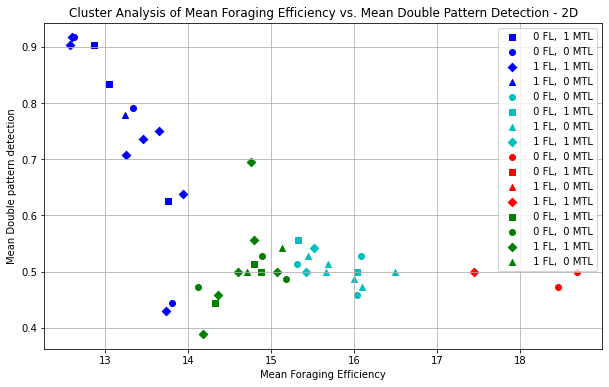

Silhouette Score: 0.542516080344202


In [10]:
ts_fe_columns = data.filter(regex='TS_FE_trial_\d+')
ts_pd2_columns = data.filter(regex='TS_PD2_trial_\d+')

# Calculate the mean of each trial
data['Mean_TS_FE'] = ts_fe_columns.mean(axis=1)
data['Mean_TS_PD2'] = ts_pd2_columns.mean(axis=1)

# Filter the data for the specified columns
data_filtered = data[['FL_group', 'MTL_group', 'Mean_TS_FE', 'Mean_TS_PD2']]

# Replace 'Low' and 'High' with numerical values (e.g., 0 for Low, 1 for High)
data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})

# Drop rows with missing values
#data_filtered.dropna(inplace=True)

# Perform K-means clustering on the features
n_clusters =4 # Number of clusters
data_features = data_filtered[['Mean_TS_FE', 'Mean_TS_PD2']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_features)

# Add cluster labels to the DataFrame
data_filtered['Cluster_Label'] = kmeans.labels_




# Assuming you have a DataFrame df containing the data
# 'Cluster_Label' is the cluster label assigned during clustering
# 'FL_group' and 'MTL_group' are the two c

# Define unique markers for each combination of 'FL_group' and 'MTL_group'
markers = ['o', 's', '^', 'D']  # You can customize this based on your preference
colors = ['b', 'g', 'r', 'c']
# Create a figure and axis for the plot

plt.figure(figsize=(10, 6))
# Loop through each cluster
for cluster_id in data_filtered['Cluster_Label'].unique():
    cluster_data = data_filtered[data_filtered['Cluster_Label'] == cluster_id]
    
    # Loop through each combination of 'FL_group' and 'MTL_group'
    for fl_group in cluster_data['FL_group'].unique():
        for mtl_group in cluster_data['MTL_group'].unique():
            subset = cluster_data[(cluster_data['FL_group'] == fl_group) & (cluster_data['MTL_group'] == mtl_group)]
            marker = markers[fl_group * 2 + mtl_group]  # Choose a marker based on 'FL_group' and 'MTL_group'
            
           

            
            plt.scatter(subset['Mean_TS_FE'], subset['Mean_TS_PD2'], label=f' {fl_group} FL,  {mtl_group} MTL',c=colors[cluster_id],marker=marker)

# Add labels, legend, and title
plt.xlabel('Mean Foraging Efficiency')
plt.ylabel('Mean Double pattern detection')
plt.legend()
plt.title('Cluster Analysis of Mean Foraging Efficiency vs. Mean Double Pattern Detection - 2D')
plt.grid(True)
# Show the plot
plt.show()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have already performed K-means clustering and have cluster labels in data_filtered
cluster_labels = data_filtered['Cluster_Label']
data_features = data_filtered[['Mean_TS_FE', 'Mean_TS_PD2']].values

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")



In [11]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans  # You can choose a clustering algorithm
# Create a K-Means clustering model with the desired number of clusters (k)
k = 3  # You can choose an appropriate number of clusters
kmeans = KMeans(n_clusters=k)
# Fit the model to your datafrom sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Create a scatter plot of the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels)
plt.title('Cluster Visualization')
plt.show()

kmeans.fit(data)
# Get cluster assignments for each data point
cluster_labels = kmeans.labels_
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Create a scatter plot of the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels)
plt.title('Cluster Visualization')
plt.show()


NameError: name 'PCA' is not defined

In [ ]:
import numpy as np
from sklearn_esn import SimpleESN
from sklearn.metrics import mean_squared_error

# Generate synthetic data
t = np.linspace(0, 20, 1000)
X = np.sin(t).reshape(-1, 1)
y = np.roll(X, shift=-1)

# Split data into training and testing sets
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

# Create and train the RCNN
reservoir = SimpleESN(n_readout=1, n_components=100, spectral_radius=0.5)
reservoir.fit(X_train, y_train)

# Make predictions
y_pred = reservoir.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


             Mean_VR_FE  Mean_VR_WM  Mean_VR_LTM  Mean_VR_PD1  Mean_VR_PD2
Mean_VR_FE     1.000000    0.954589     0.955864    -0.591171    -0.550118
Mean_VR_WM     0.954589    1.000000     0.852734    -0.406259    -0.371573
Mean_VR_LTM    0.955864    0.852734     1.000000    -0.627171    -0.548187
Mean_VR_PD1   -0.591171   -0.406259    -0.627171     1.000000     0.854882
Mean_VR_PD2   -0.550118   -0.371573    -0.548187     0.854882     1.000000


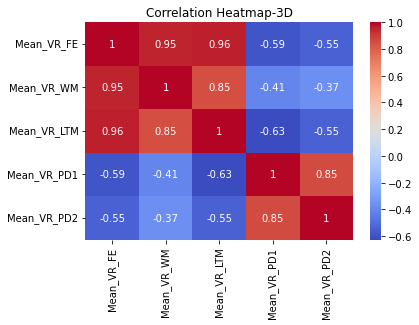

In [15]:
import seaborn as sns
selected_columns=['Mean_VR_FE', 'Mean_VR_WM','Mean_VR_LTM','Mean_VR_PD1','Mean_VR_PD2']
df=data[selected_columns]
correlation_matrix = df.corr()
print(correlation_matrix)
#fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap-3D')
plt.show()

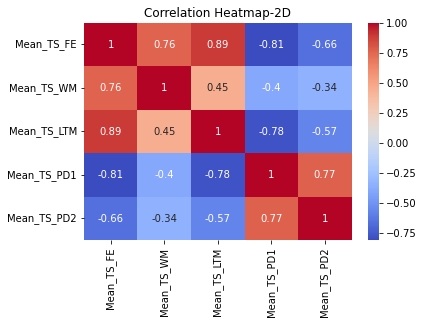

In [12]:
import seaborn as sns
selected_columns=['Mean_TS_FE', 'Mean_TS_WM','Mean_TS_LTM','Mean_TS_PD1','Mean_TS_PD2']
df=data[selected_columns]
correlation_matrix = df.corr()
#fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap-2D')
plt.show()


In [29]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming you have a DataFrame named 'data' with the necessary columns
# Replace 'Cluster' with the actual column name that contains cluster labels

# List of cluster labels (adjust this based on your actual data)
cluster_labels = [1, 2, 3, 4]

# Loop through clusters
for cluster in cluster_labels:
    # Extract data for the current cluster
    cluster_data = data_filtered[data_filtered['Cluster_Label'] == cluster]

    # Perform ANOVA for the current cluster
    f_statistic, p_value = stats.f_oneway(
        cluster_data['Mean_VR_FE'],
        cluster_data['Mean_VR_WM'],
        cluster_data['Mean_VR_LTM'],
        cluster_data['Mean_VR_PD1'],
        cluster_data['Mean_VR_PD2']
    )

    print(f"Cluster {cluster} - ANOVA Results:")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)
        # Perform Tukey's HSD post hoc analysis
    tukey_result = pairwise_tukeyhsd(
        cluster_data[['Foraging_Efficiency', 'Working_Memory', 'Long_Term_Memory', 'Single_Pattern_Detection', 'Double_Pattern_Detection']].values.flatten(),
        cluster_data['Task'].values.flatten()
    )

    print(f"Cluster {cluster} - Tukey's HSD Results:")
    print(tukey_result.summary())



AttributeError: module 'numpy' has no attribute 'MachAr'

In [25]:
import seaborn as sns
selected_columns=['FL_group','MTL_group']
df=data[selected_columns]
correlation_matrix = df.corr()
#fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [ ]:
from sklearn.model_selection import train_test_split

X=data[['Mean_VR_FE', 'Mean_VR_WM']]
y=data['Mean_VR_LTM']
# Assuming you have a dataset X (features) and y (labels/targets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Training features
# X_test: Test features
# y_train: Training labels/targets
# y_test: Test labels/targets

# The 'test_size' parameter specifies the proportion of data to be used for testing.
# 'random_state' ensures reproducibility; it sets a seed for the random number generator.
from sklearn.linear_model import LogisticRegression

# Create a classification model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy}")


In [ ]:
X=data[['Mean_VR_FE', 'Mean_VR_WM']]
y=data['MTL_group']
# Assuming you have a dataset X (features) and y (labels/targets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Training features
# X_test: Test features
# y_train: Training labels/targets
# y_test: Test labels/targets

# The 'test_size' parameter specifies the proportion of data to be used for testing.
# 'random_state' ensures reproducibility; it sets a seed for the random number generator.
from sklearn.linear_model import LogisticRegression

# Create a classification model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy}")


In [ ]:
data[['Mean_TS_FE', 'Mean_TS_LTM','Mean_TS_WM', 'Mean_VR_FE','Mean_VR_WM', 'Mean_VR_LTM']]

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Load your data (assuming it's stored in a CSV file)
data = pd.read_excel('Data.xlsx')
vr_fe_columns = data.filter(regex='VR_FE_trial_\d+')
vr_wm_columns = data.filter(regex='VR_WM_trial_\d+')


data['Mean_VR_FE'] = vr_fe_columns.mean(axis=1)
data['Mean_VR_WM'] = vr_wm_columns.mean(axis=1)

# Filter the data for the specified columns
data_filtered = data[['FL_group', 'MTL_group', 'Mean_VR_FE', 'Mean_VR_WM']]

# Replace 'Low' and 'High' with numerical values (e.g., 0 for Low, 1 for High)
data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})

# Perform K-means clustering on the features
n_clusters = 2 # Number of clusters
data_features = data_filtered[['Mean_VR_FE', 'Mean_VR_WM']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_features)

# Add cluster labels to the DataFrame
data_filtered['Cluster_Label'] = kmeans.labels_

# Define unique markers for each combination of 'FL_group' and 'MTL_group'
markers = ['o', 's', '^', 'D']  # You can customize this based on your preference
colors = ['b', 'g', 'r', 'c']

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Define a dictionary to map combinations of 'FL_group' and 'MTL_group' to markers
marker_dict = {(0, 0): 'o', (0, 1): 's', (1, 0): '^', (1, 1): 'D'}

# Loop through each cluster
for cluster_id in data_filtered['Cluster_Label'].unique():
    cluster_data = data_filtered[data_filtered['Cluster_Label'] == cluster_id]

    # Loop through each combination of 'FL_group' and 'MTL_group'
    for fl_group in cluster_data['FL_group'].unique():
        for mtl_group in cluster_data['MTL_group'].unique():
            subset = cluster_data[(cluster_data['FL_group'] == fl_group) & (cluster_data['MTL_group'] == mtl_group)]
            marker = markers[fl_group * 2 + mtl_group]  # Choose a marker based on 'FL_group' and 'MTL_group'
            plt.scatter(
                subset['Mean_VR_FE'],
                subset['Mean_VR_WM'],
                c=colors[cluster_id],
                marker=marker,
                label=f'Cluster {cluster_id}, {fl_group} FL, {mtl_group} MTL',
                linestyle='None',               
                
            )

# Create a legend for colors (clusters)            
shape_legend_handles = [
    mlines.Line2D([], [], marker=marker_dict[(fl_group, mtl_group)], markersize=10, 
                   label=f'FL: {fl_group}, MTL: {mtl_group}')
    for fl_group in [0, 1] for mtl_group in [0, 1]
]

shape_legend = plt.legend(
    handles=shape_legend_handles,
    title='FL_group, MTL_group',
    loc='lower right',
)

# Create a legend for colors (clusters)
color_legend = plt.legend(
    [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors],
    [f'Cluster {i}' for i in range(n_clusters)],
    title='Clusters',
    loc='best',
)

# Add labels, title, and grid
plt.xlabel('Mean Foraging Efficiency')
plt.ylabel('Mean Working Memory')
plt.title('Cluster Analysis of Mean Foraging Efficiency vs. Mean Working Memory')
plt.grid(True)

# Combine both legends
plt.gca().add_artist(shape_legend)

# Show the plot
plt.show()




In [ ]:

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Load your data (assuming it's stored in a CSV file)
data = pd.read_excel('Data.xlsx')
vr_fe_columns = data.filter(regex='VR_FE_trial_\d+')
vr_wm_columns = data.filter(regex='VR_WM_trial_\d+')


data['Mean_VR_FE'] = vr_fe_columns.mean(axis=1)
data['Mean_VR_WM'] = vr_wm_columns.mean(axis=1)

# Filter the data for the specified columns
data_filtered = data[['FL_group', 'MTL_group', 'Mean_VR_FE', 'Mean_VR_WM']]

# Replace 'Low' and 'High' with numerical values (e.g., 0 for Low, 1 for High)
data_filtered['FL_group'] = data_filtered['FL_group'].map({'Low FL': 0, 'High FL': 1})
data_filtered['MTL_group'] = data_filtered['MTL_group'].map({'Low MTL': 0, 'High MTL': 1})

# Perform K-means clustering on the features
n_clusters = 4 # Number of clusters
data_features = data_filtered[['Mean_VR_FE', 'Mean_VR_WM']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_features)

# Add cluster labels to the DataFrame
data_filtered['Cluster_Label'] = kmeans.labels_

# Define unique markers for each combination of 'FL_group' and 'MTL_group'
markers = ['o', 's', '^', 'D']  # You can customize this based on your preference
colors = ['b', 'g', 'r', 'c']

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Define a dictionary to map combinations of 'FL_group' and 'MTL_group' to markers
marker_dict = {(0, 0): 'o', (0, 1): 's', (1, 0): '^', (1, 1): 'D'}

# Loop through each cluster
for cluster_id in data_filtered['Cluster_Label'].unique():
    cluster_data = data_filtered[data_filtered['Cluster_Label'] == cluster_id]

    # Loop through each combination of 'FL_group' and 'MTL_group'
    for fl_group in cluster_data['FL_group'].unique():
        for mtl_group in cluster_data['MTL_group'].unique():
            subset = cluster_data[(cluster_data['FL_group'] == fl_group) & (cluster_data['MTL_group'] == mtl_group)]
            marker = markers[fl_group * 2 + mtl_group]  # Choose a marker based on 'FL_group' and 'MTL_group'
            plt.scatter(
                subset['Mean_VR_FE'],
                subset['Mean_VR_WM'],
                c=colors[cluster_id],
                marker=marker,
                label=f'Cluster {cluster_id}, {fl_group} FL, {mtl_group} MTL',
                linewidth=0,            
                
            )

# Create a legend for colors (clusters)            
shape_legend_handles = [
    mlines.Line2D([], [], marker=marker_dict[(fl_group, mtl_group)], markersize=10, 
                   label=f'FL: {fl_group}, MTL: {mtl_group}')
    for fl_group in [0, 1] for mtl_group in [0, 1]
    
]

shape_legend = plt.legend(
    handles=shape_legend_handles,
    title='FL_group, MTL_group',
    loc='lower right',
)

# Create a legend for colors (clusters)
color_legend = plt.legend(
    [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors],
    [f'Cluster {i}' for i in range(n_clusters)],
    title='Clusters',
    loc='best',
)

# Add labels, title, and grid
plt.xlabel('Mean Foraging Efficiency')
plt.ylabel('Mean Working Memory')
plt.title('Cluster Analysis of Mean Foraging Efficiency vs. Mean Working Memory')
plt.grid(True)

# Combine both legends
plt.gca().add_artist(shape_legend)

# Show the plot
plt.show()





